# Homework 8b: Integrals, Interpolation, Curve Fit 

### Problem 1

Find the numerical integral of the following function:
$$I = \int_0^{3\pi} \frac{e^{x}\sin^3(x)}{x^2}dx.$$

Try to find the symbolic solution using Sympy and report what happens.

In [86]:
import sympy as sp
x = sp.Symbol('x')
print('Symbolic')
sp.integrate((sp.exp(x) * (sp.sin(x))**3 / x**2),x)

Symbolic


Integral(exp(x)*sin(x)**3/x**2, x)

In [87]:
from scipy.integrate import quad


def f(x):
    return sp.exp(x) * (sp.sin(x))**3 / x**2

i = quad(f,0,3*sp.pi)

print('Numerical Answer =')
print(i[0])


Numerical Answer =
55.88692117276372


In [88]:
import numpy as np
def f(x):
    return np.exp(x) * (np.sin(x))**3 / x**2

i = quad(f,0,3*np.pi)

print('Numerical Answer =')
print(i[0])

Numerical Answer =
55.88692117276372


### Problem 2
Given the data ```x_given``` and ```y_given``` below. Find the linear interpolate y_il corresponding to ```x_i=0.54```. Also find the cubic spline value of y_is at the same point. The ```x_given``` and ```y_given``` values are computed from $y=f(x)=\exp(4x)$. Find the relative error between your interpolants and the exact value. The relative error is given by $\epsilon = |(y-y_{exact})/y_{exact}|$. Are you happy with the result?

error for Linear is = 0.3615118465247755
error for Cubic Spline is = -0.05784101573428153
The Cubic Spline is a close to acceptable answer,while the Linear is not a great answer, but maybe good for a initial guess


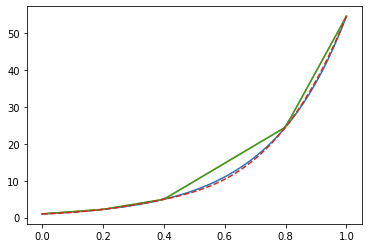

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.interpolate import *
%matplotlib inline


x = np.linspace(0,1)
y = np.exp(4*x)
plt.plot(x,y)

x_given = np.array([0,0.2,0.4,0.8,1.0])
y_given = np.exp(4.0*x_given)
plt.plot(x_given,y_given)


#Linear Interpolate

f1 = interp1d(x_given, y_given)
y1     = f1(x)
plt.plot(x,y1,'-')


#Cubic Spline Value Interpolation

f2 = interp1d(x_given, y_given, kind='cubic')
y2 = f2(x)
plt.plot(x,y2,'--')



x_i     = 0.54
y_exact = np.exp(4*x_i)

y1 = f1(x_i)
y2 = f2(x_i)

print('error for Linear is =',(y1-y_exact)/y_exact)
print('error for Cubic Spline is =',(y2-y_exact)/y_exact)
print('The Cubic Spline is a close to acceptable answer,\
while the Linear is not a great answer, but maybe good for \
a initial guess')



### Problem 3

In a previous assignment we used thermo data for heat capacities of species. Its kind of annoying that we have two temperature ranges for each species. For the given array of temperatures (K) below, the corresponding cp/Rg array is given for CH4. This is computed using the equations and the coefficients for the two temperature ranges given in previous assignments.

Fit a single 4th order polynomial to the whole range of temperature data. At each point, compare your polynomial fit to the one given. 

Report the maximum relative error that occurs over the list of temperatures.

Plot the two versions to visually compare the original data and your polynomial fit.

0.04918219645017454


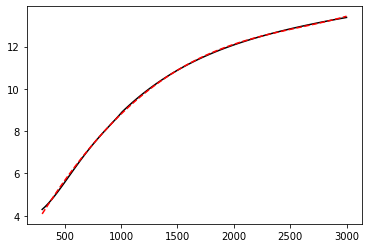

In [90]:
T = np.linspace(300.,3000.,100)

a_lo = np.array([ 5.15,-1.37E-02,4.92E-05,-4.85E-08,1.67E-11])
a_hi = np.array([7.49E-02,1.34E-02,-5.73E-06,1.22E-09,-1.02E-13])
i_lo = np.where(np.logical_and(T>=300.0, T<1000.0))
i_hi = np.where(np.logical_and(T>=1000.0, T<=3000.0))
cpRg = np.zeros(100)
cpRg[i_lo] = a_lo[0] + a_lo[1]*T[i_lo] + a_lo[2]*T[i_lo]**2.0 + \
             a_lo[3]*T[i_lo]**3.0 + a_lo[4]*T[i_lo]**4.0
cpRg[i_hi] = a_hi[0] + a_hi[1]*T[i_hi] + a_hi[2]*T[i_hi]**2.0 + \
             a_hi[3]*T[i_hi]**3.0 + a_hi[4]*T[i_hi]**4.0


p4 = np.polyfit(T,cpRg,4)
cpRg_new = np.polyval(p4,T)

plt.plot(T,cpRg,'k-')
plt.plot(T,cpRg_new, 'r--')

RelErr = np.abs((cpRg-cpRg_new)/cpRg)
maxRelErr = np.max(RelErr)
print(maxRelErr)

### Problem 4
The following kinetic R(T) were collected. We want to fit this to the following model function: $R = kT^me^{-E_a/(R_gT)}$. Here, $k$, $m$, and $(E_a/R_g)$, are adjustable parameters that we want to find so that our model best fits the data. 

Find the best parameters and plot the data and the model function together on the same graph.


Best Adjustable parameters [k,m,EaRg]
[ 1.12599617e-02  1.02459777e+00 -1.39367349e+03]


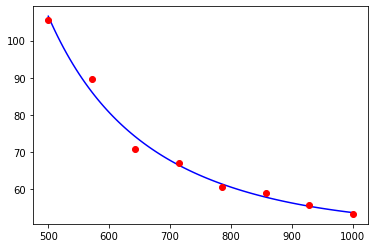

In [91]:
from scipy.optimize import curve_fit
T = np.linspace(500.,1000.,8)
R = [105.598, 89.700, 70.768, 66.996, 60.711, 58.992, 55.8328, 53.420]


def f(x,k,m,EaRg):
    return k * x**m * np.exp(-EaRg/x)

params, extras = curve_fit(f, T, R,)


k = params[0]
m = params[1]
EaRg = params[2]

T_more = np.linspace(500,1000,100)
R_fit = f(T_more,k,m,EaRg)

print('Best Adjustable parameters [k,m,EaRg]')
print(params)
plt.plot(T_more,R_fit,'b-')
plt.plot(T,R,'ro')